In [227]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#load iris 
from sklearn import datasets
#disabling warnings
import warnings

warnings.filterwarnings("ignore")

- Load Dataset

In [228]:
iris_dataset = datasets.load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
#simplyfiying the column names
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
#display the first 10 rows
iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


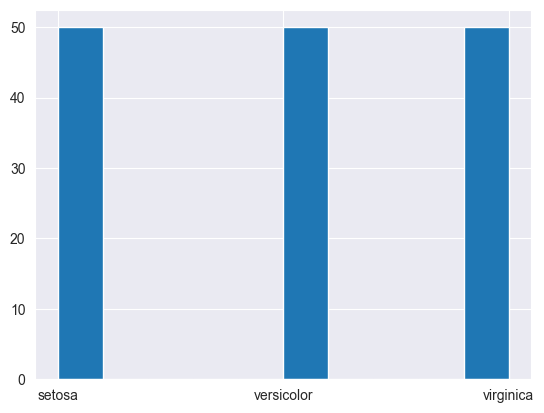

In [229]:
iris["species"].hist()
iris.describe()

- Correlation Matrix

<Axes: >

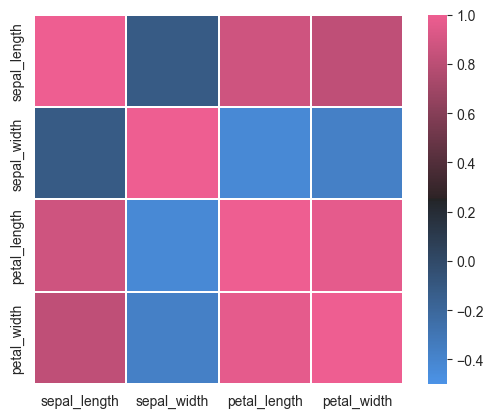

In [230]:
corr = iris.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [231]:
#since the correlation between petal length and petal width is 0.96, we can drop one of them
#we will drop petal width
iris.drop("petal_width", axis=1, inplace=True)
iris.head()


,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

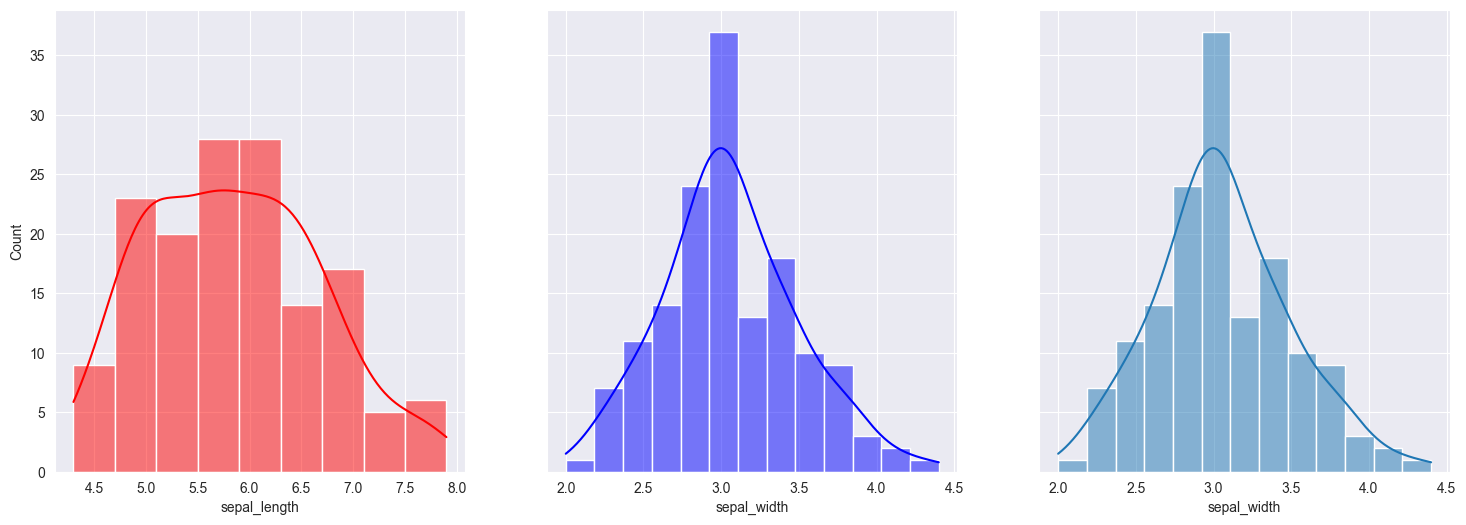

In [232]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(iris, ax=axes[0], x="sepal_length", kde=True, color='r')
sns.histplot(iris, ax=axes[1], x="sepal_width", kde=True, color='b')
sns.histplot(iris, ax=axes[2], x="sepal_width", kde=True)


## Convert continuous features to Categorical features

In [233]:
#convert to categorical
iris["species"] = iris["species"].astype('category')
iris["species"] = iris["species"].cat.codes
iris.head(100)

#convert the sepal length to categorical
iris["sepal_length"] = pd.cut(iris["sepal_length"], bins=[4,5,6,7,8], labels=[1,2,3,4])
iris["sepal_length"] = iris["sepal_length"].astype('category')
iris["sepal_length"] = iris["sepal_length"].cat.codes

#convert the sepal width to categorical
iris["sepal_width"] = pd.cut(iris["sepal_width"], bins=[2,3,4,5,6], labels=[1,2,3,4])
iris["sepal_width"] = iris["sepal_width"].astype('category')
iris["sepal_width"] = iris["sepal_width"].cat.codes

#convert the petal length to categorical
iris["petal_length"] = pd.cut(iris["petal_length"], bins=[1,2,3,4,5,6,7], labels=[1,2,3,4,5,6])
iris["petal_length"] = iris["petal_length"].astype('category')
iris["petal_length"] = iris["petal_length"].cat.codes

iris.head(100)

,sepal_length,sepal_width,petal_length,species
0,1,1,0,0
1,0,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
95,1,0,3,1
96,1,0,3,1
97,2,0,3,1
98,1,0,1,1


In [234]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.variance = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.variance = np.zeros((len(self.classes), X.shape[1]))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[idx] = len(X_c) / len(X)
            self.mean[idx] = np.mean(X_c, axis=0)
            self.variance[idx] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes):
                prior = np.log(self.class_priors[idx])
                likelihood = np.sum(np.log(self._pdf(idx, x)))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx]
        numerator = np.exp(-0.5 * ((x - mean) ** 2) / var)
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [235]:
gaussian_nb = NaiveBayesClassifier()
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [236]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

def k_fold_cross_validation(classifier, X, y, k=10):
    n_samples = len(X)
    fold_size = n_samples // k
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    results = []

    for i in range(k):
        start = i * fold_size
        end = min((i + 1) * fold_size, n_samples)
        test_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])

        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Compute evaluation metrics
        correct_classified = np.sum(y_pred == y_test)
        incorrect_classified = np.sum(y_pred != y_test)
        mse = np.mean((y_pred - y_test) ** 2)
        rmse = np.sqrt(mse)
        # RAE = (Sum of absolute differences between predicted and actual values) / (Sum of absolute differences between actual values and the mean of actual values)
        ae = np.sum(np.abs(y_pred - y_test)) / np.sum(np.abs(y_test - np.mean(y_test)))
        cm = confusion_matrix(y_test, y_pred)
        # True Positive Rate (TPR) = TP / (TP + FN) for a given class
    #    [[4, 0, 0],
    #     [0, 7, 0],
    #     [0, 1, 8]]
        #sum of the diagonal / sum of the entire matrix
        tp = np.diag(cm) / np.sum(cm, axis=1)
        #mean of the the values
        tp = np.mean(tp)
        # False Positive Rate (FPR) = FP / (FP + TN) for a given class
        #sum of the off-diagonal / sum of the entire matrix
        fp = (np.sum(cm, axis=0) - np.diag(cm)) / np.sum(cm, axis=0)
        #mean of the the values
        fp = np.mean(fp)
        fp = np.nan_to_num(fp)
        
        total = np.sum(cm)
        p0 = np.sum(np.diag(cm)) / total
        pc = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1)) / (total ** 2)
        kappa = (p0 - pc) / (1 - pc)

        acc = correct_classified / (correct_classified + incorrect_classified)

        # Store results
        results.append({
            "Fold": i+1,
            "Correctly Classified": correct_classified,
            "Incorrectly Classified": incorrect_classified,
            "Root Mean Squared Error": rmse,
            "Relative Absolute Error": ae,
            "True Positive Rate": tp,
            "False Positive Rate": fp,
            "Confusion Matrix": cm,
            "Kappa Score": kappa,
            "Accuracy" : acc
        })

    # Print results as pretty table
    headers = ["Fold", "Correctly Classified", "Incorrectly Classified", 
               "Root Mean Squared Error", "Relative Absolute Error", 
               "True Positive Rate", "False Positive Rate", "Confusion Matrix", "Kappa Score", "Accuracy"]
    table = [[r["Fold"], r["Correctly Classified"], r["Incorrectly Classified"], 
              r["Root Mean Squared Error"], r["Relative Absolute Error"], 
              r["True Positive Rate"], r["False Positive Rate"], r["Confusion Matrix"], r["Kappa Score"] , r["Accuracy"]] for r in results]
    print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

    # Compute average evaluation metrics across all folds
    avg_correct_classified = np.mean([r["Correctly Classified"] for r in results])
    avg_incorrect_classified = np.mean([r["Incorrectly Classified"] for r in results])
    avg_rmse = np.mean([r["Root Mean Squared Error"] for r in results])
    avg_rae = np.mean([r["Relative Absolute Error"] for r in results])
    avg_tpr = np.mean([r["True Positive Rate"] for r in results])
    avg_fpr = np.mean([r["False Positive Rate"] for r in results])
    avg_kappa = np.mean([r["Kappa Score"] for r in results])
    avg_acc = np.mean([r["Accuracy"] for r in results])

    # Print average evaluation metrics across all folds
    print("\nAverage Evaluation Metrics Across All Folds:")
    print(f"Average Correctly Classified Instances: {avg_correct_classified}")
    print(f"Average Incorrectly Classified Instances: {avg_incorrect_classified}")
    print(f"Average Root Mean Squared Error: {avg_rmse}")
    print(f"Average Relative Absolute Error: {avg_rae}")
    print(f"Average True Positive Rate: {avg_tpr}")
    print(f"Average False Positive Rate: {avg_fpr}")
    print(f"Average Kappa Score: {avg_kappa}")
    print(f"Average Accuracy: {avg_acc}")


In [237]:
# Perform k-fold cross-validation
k_fold_cross_validation(gaussian_nb, X, y, k=10)

╒════════╤════════════════════════╤══════════════════════════╤═══════════════════════════╤═══════════════════════════╤══════════════════════╤═══════════════════════╤════════════════════╤═══════════════╤════════════╕
│   Fold │   Correctly Classified │   Incorrectly Classified │   Root Mean Squared Error │   Relative Absolute Error │   True Positive Rate │   False Positive Rate │ Confusion Matrix   │   Kappa Score │   Accuracy │
╞════════╪════════════════════════╪══════════════════════════╪═══════════════════════════╪═══════════════════════════╪══════════════════════╪═══════════════════════╪════════════════════╪═══════════════╪════════════╡
│      1 │                     13 │                        2 │                  0.365148 │                 0.230769  │             0.777778 │             0.0740741 │ [[5 0 0]           │      0.776119 │   0.866667 │
│        │                        │                          │                           │                           │                  

In [238]:
# Load HEART Dataset
# heart_train = pd.read_csv("./heart/spect_train.csv")
# heart_test = pd.read_csv("./heart/spect_test.csv")
heart_train = pd.read_csv("heart.csv")
heart_test = pd.read_csv("heart_test.csv")
heart_test.head()
heart_train.head()

heart = pd.concat([heart_train, heart_test])
heart.shape

(267, 23)

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.794007,0.445693,0.247191,0.393258,0.284644,0.404494,0.235955,0.284644,0.426966,0.310861,...,0.494382,0.303371,0.176030,0.310861,0.142322,0.131086,0.247191,0.322097,0.363296,0.411985
std,0.405185,0.497975,0.432189,0.489391,0.452092,0.491716,0.425392,0.452092,0.495566,0.463715,...,0.500907,0.460577,0.381561,0.463715,0.350036,0.338128,0.432189,0.468158,0.481852,0.493117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


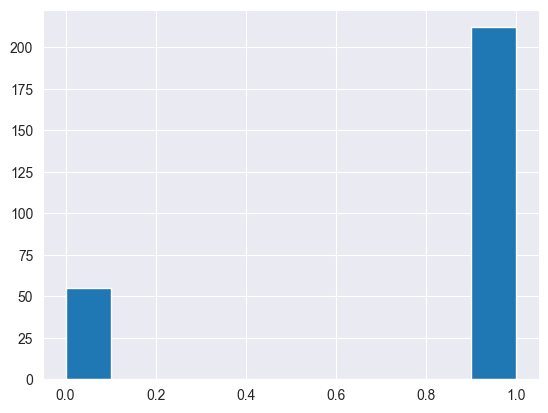

In [239]:
#rename OVERALL_DIAGNOSIS to diagnosis
heart["OVERALL_DIAGNOSIS"].hist()
heart.describe()

<Axes: >

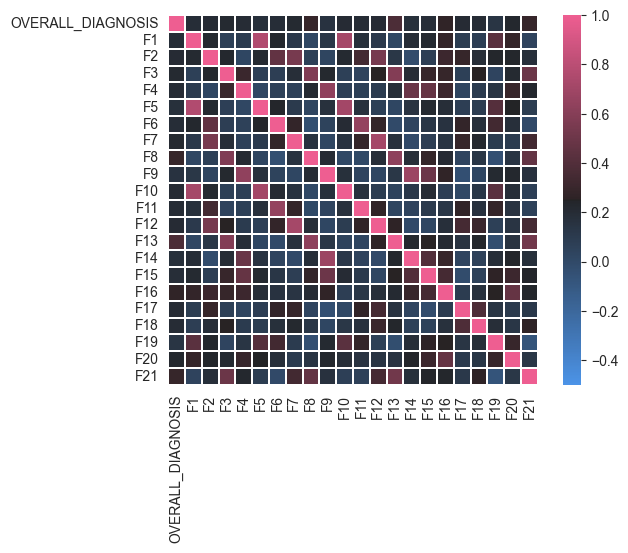

In [240]:
corr = heart.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [241]:
# Perform k-fold cross-validation
# Perform k-fold cross-validation
k_fold_cross_validation(gaussian_nb, heart.iloc[:, :-1].values, heart.iloc[:, -1].values, k=10)

╒════════╤════════════════════════╤══════════════════════════╤═══════════════════════════╤═══════════════════════════╤══════════════════════╤═══════════════════════╤════════════════════╤═══════════════╤════════════╕
│   Fold │   Correctly Classified │   Incorrectly Classified │   Root Mean Squared Error │   Relative Absolute Error │   True Positive Rate │   False Positive Rate │ Confusion Matrix   │   Kappa Score │   Accuracy │
╞════════╪════════════════════════╪══════════════════════════╪═══════════════════════════╪═══════════════════════════╪══════════════════════╪═══════════════════════╪════════════════════╪═══════════════╪════════════╡
│      1 │                     15 │                       11 │                  0.650444 │                  1.07519  │             0.620301 │              0.404762 │ [[10  9]           │     0.182857  │   0.576923 │
│        │                        │                          │                           │                           │                  